# 1  Load and Inspect the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error
plt.style.use('ggplot')

In [2]:
data = pd.read_excel('/content/drive/MyDrive/data/online_retail_II.xlsx', sheet_name=None)

In [3]:
data['Year 2009-2010']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [4]:
data['Year 2009-2010'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
data['Year 2009-2010'].isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
data['Year 2010-2011']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
data['Year 2010-2011'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
data['Year 2010-2011'].isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [9]:
df = pd.concat([data['Year 2009-2010'], data['Year 2010-2011']], ignore_index=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [11]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [12]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# 2 Basic Data Cleaning


In [13]:
# Handling missing values by dropping rows with any missing values
df.dropna(inplace=True)

In [14]:
# Convert data types to more efficient formats
df['Invoice'] = df['Invoice'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')
df['Description'] = df['Description'].astype('category')
df['Customer ID'] = df['Customer ID'].astype('category')
df['Country'] = df['Country'].astype('category')

In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  category      
 1   StockCode    824364 non-null  category      
 2   Description  824364 non-null  category      
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  category      
 7   Country      824364 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 35.7 MB


In [17]:
df.describe()

,Quantity,InvoiceDate,Price
count,824364.000000,824364,824364.000000
mean,12.414574,2011-01-01 22:29:28.042054144,3.676800
min,-80995.000000,2009-12-01 07:45:00,0.000000
25%,2.000000,2010-07-06 11:58:00,1.250000
50%,5.000000,2010-12-03 14:26:00,1.950000
75%,12.000000,2011-07-27 15:14:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,188.976099,NaN,70.241388


In [18]:
# Keep rows where Quantity and Price is greater than zero
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [19]:
# Remove outliers using the IQR method

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Quantity
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Price
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the outlier bounds
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter out the outliers
df = df[(df['Quantity'] >= lower_bound_quantity) & (df['Quantity'] <= upper_bound_quantity)]
df = df[(df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price)]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686764 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      686764 non-null  category      
 1   StockCode    686764 non-null  category      
 2   Description  686764 non-null  category      
 3   Quantity     686764 non-null  int64         
 4   InvoiceDate  686764 non-null  datetime64[ns]
 5   Price        686764 non-null  float64       
 6   Customer ID  686764 non-null  category      
 7   Country      686764 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 30.0 MB


<Axes: xlabel='Quantity'>

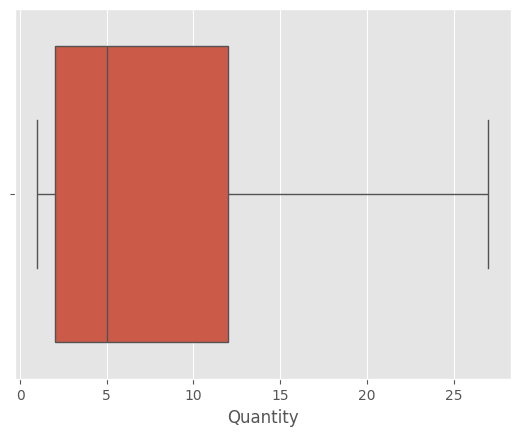

In [21]:
sns.boxplot(x=df['Quantity'])

<Axes: xlabel='Price'>

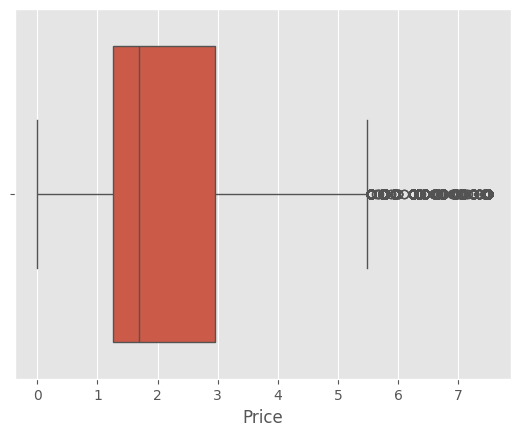

In [22]:
sns.boxplot(x=df['Price'])

In [23]:
df.describe()

,Quantity,InvoiceDate,Price
count,686764.000000,686764,686764.000000
mean,7.298669,2011-01-02 15:49:33.452889344,2.275020
min,1.000000,2009-12-01 07:45:00,0.001000
25%,2.000000,2010-07-06 16:07:15,1.250000
50%,5.000000,2010-12-03 12:28:00,1.690000
75%,12.000000,2011-07-31 15:00:00,2.950000
max,27.000000,2011-12-09 12:50:00,7.500000
std,6.696131,NaN,1.607099


# 3 Exploratory Data Analysis (EDA)

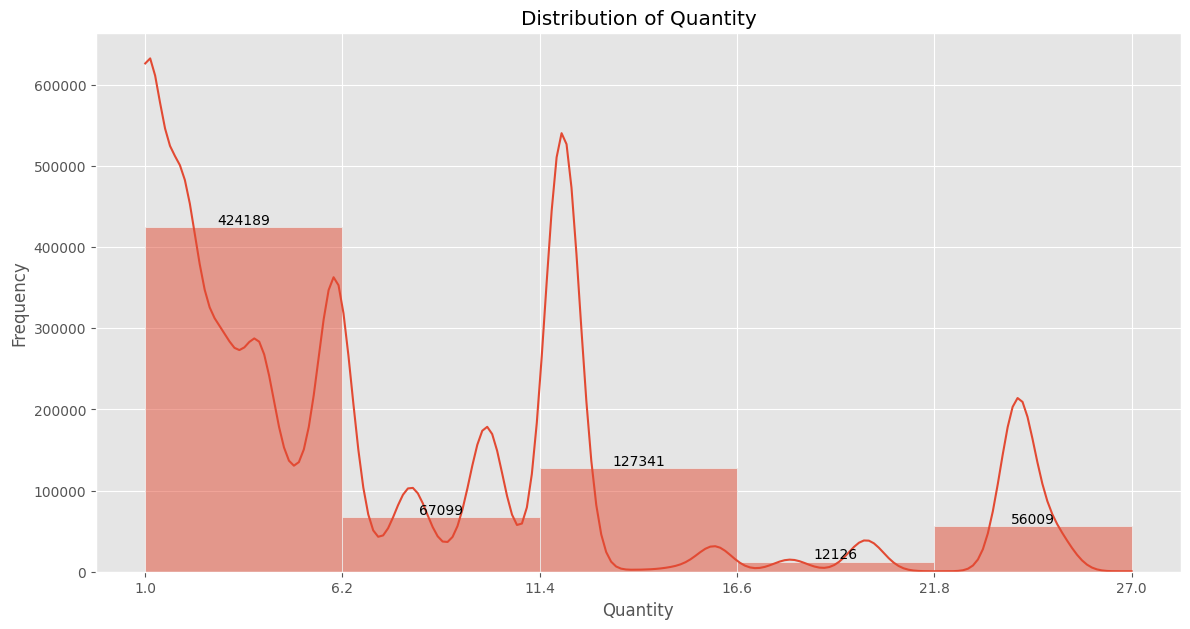

In [24]:
# Calculate the bin edges
bin_edges = np.histogram_bin_edges(df['Quantity'], bins=5)

# Distribution of Quantity
plt.figure(figsize=(14, 7))
ax = sns.histplot(df['Quantity'], bins=5, kde=True)
plt.xticks(bin_edges)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Use bar_label to annotate the bars with their frequencies
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

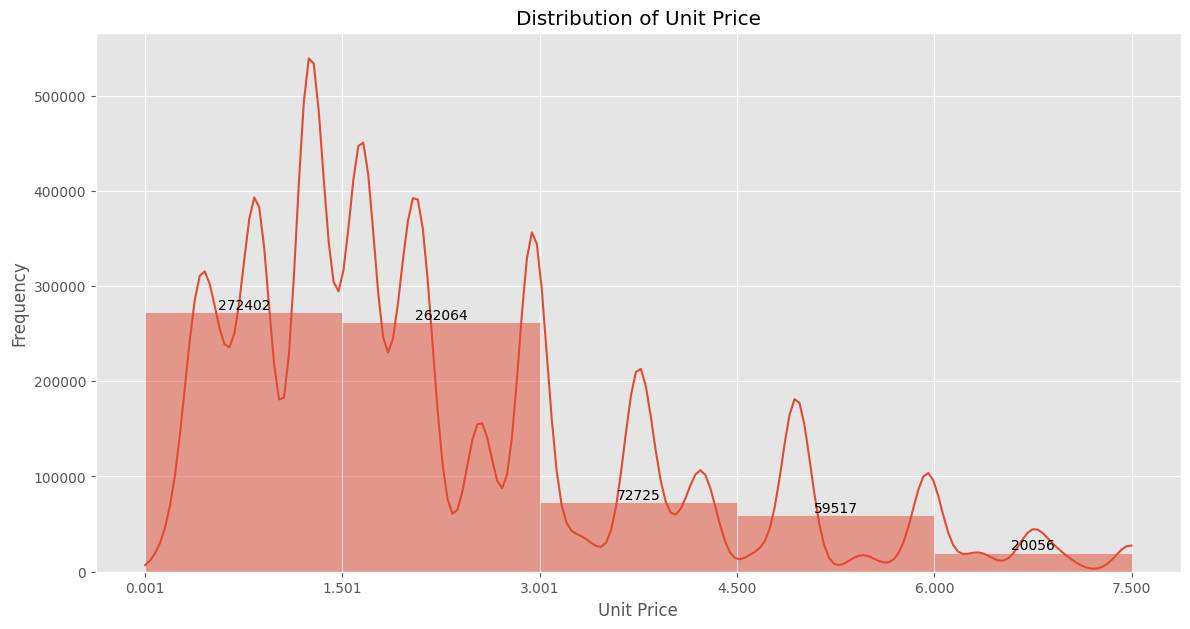

In [25]:
# Calculate the bin edges
bin_edges = np.histogram_bin_edges(df['Price'], bins=5)

# Distribution of Price
plt.figure(figsize=(14, 7))
ax = sns.histplot(df['Price'], bins=5, kde=True)
plt.xticks(bin_edges)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

# Use bar_label to annotate the bars with their frequencies
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

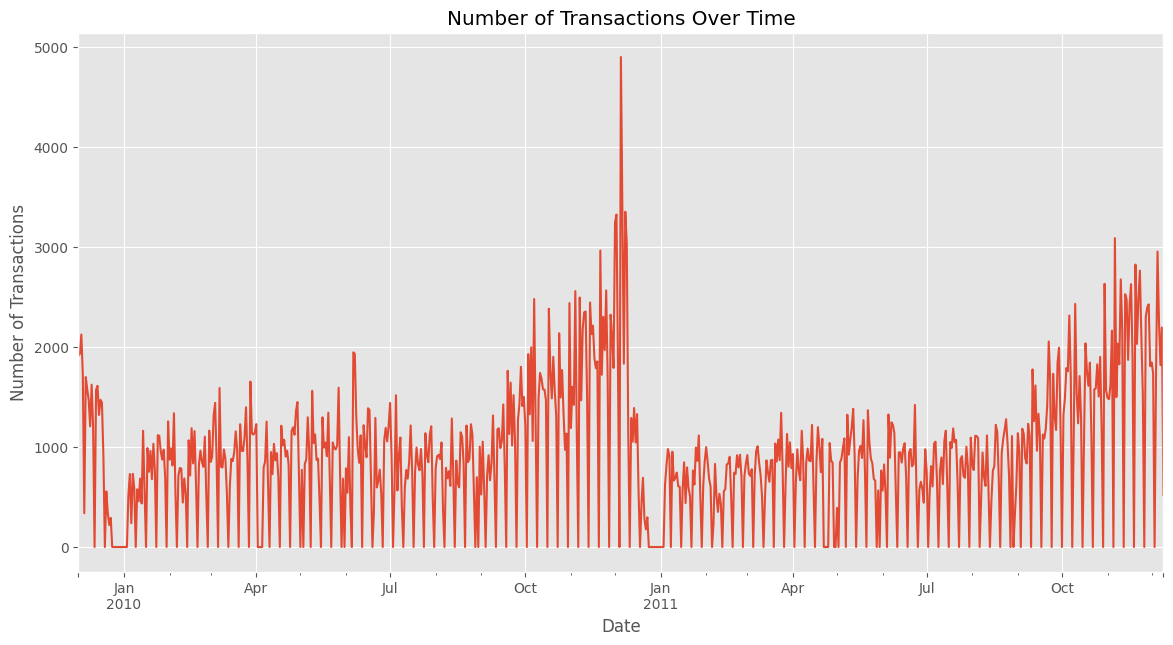

In [26]:
# Set the 'InvoiceDate' column as the index of the DataFrame
df.set_index('InvoiceDate', inplace=True)

# Resample the data by day ('D') and count the number of transactions ('Invoice') per day
transaction_counts = df['Invoice'].resample('D').count()

# Plot the resampled data
transaction_counts.plot(figsize=(14, 7))
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Reset index for further analysis
df.reset_index(inplace=True)

# 4 Feature Engineering


In [27]:
# Extract day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6

# Extract month
df['Month'] = df['InvoiceDate'].dt.month

# Extract quarter
df['Quarter'] = df['InvoiceDate'].dt.quarter

# Extract hour
df['Hour'] = df['InvoiceDate'].dt.hour

# Extract year
df['Year'] = df['InvoiceDate'].dt.year

# Create Year-Month and Year-Quarter features
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['YearQuarter'] = df['InvoiceDate'].dt.to_period('Q')

In [28]:
df.head()

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,DayOfWeek,Month,Quarter,Hour,Year,YearMonth,YearQuarter
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,1,12,4,7,2009,2009-12,2009Q4
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,1,12,4,7,2009,2009-12,2009Q4
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,1,12,4,7,2009,2009-12,2009Q4
3,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,1,12,4,7,2009,2009-12,2009Q4
4,2009-12-01 07:45:00,489434,22064,PINK DOUGHNUT TRINKET POT,24,1.65,13085.0,United Kingdom,1,12,4,7,2009,2009-12,2009Q4


In [29]:
df[['DayOfWeek', 'Month', 'Quarter', 'Hour', 'Year']].describe()

,DayOfWeek,Month,Quarter,Hour,Year
count,686764.000000,686764.000000,686764.000000,686764.000000,686764.000000
mean,2.677937,7.535379,2.830613,12.847180,2010.421506
std,1.972520,3.450257,1.135044,2.270502,0.566667
min,0.000000,1.000000,1.000000,6.000000,2009.000000
25%,1.000000,5.000000,2.000000,11.000000,2010.000000
50%,3.000000,8.000000,3.000000,13.000000,2010.000000
75%,4.000000,11.000000,4.000000,14.000000,2011.000000
max,6.000000,12.000000,4.000000,20.000000,2011.000000


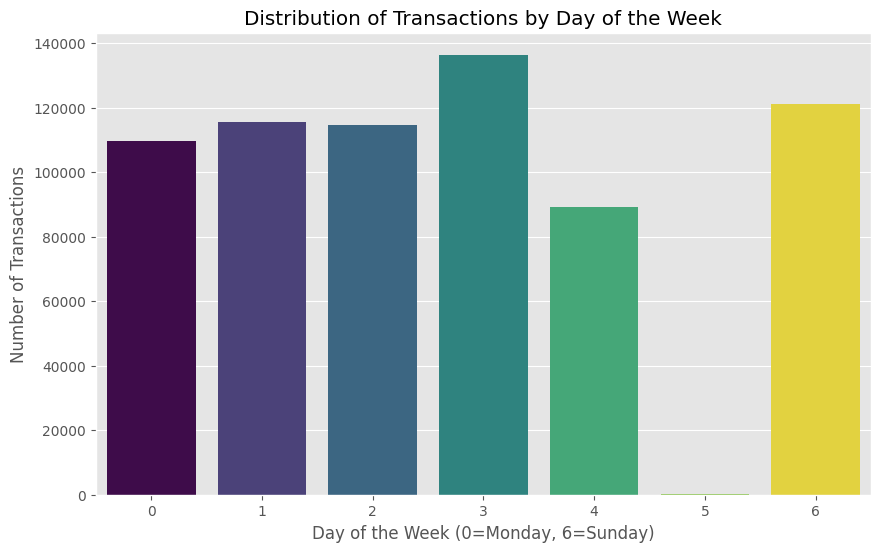

In [30]:
# Plot distribution of transactions by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='viridis', hue='DayOfWeek', legend=False)
plt.title('Distribution of Transactions by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Transactions')
plt.show()

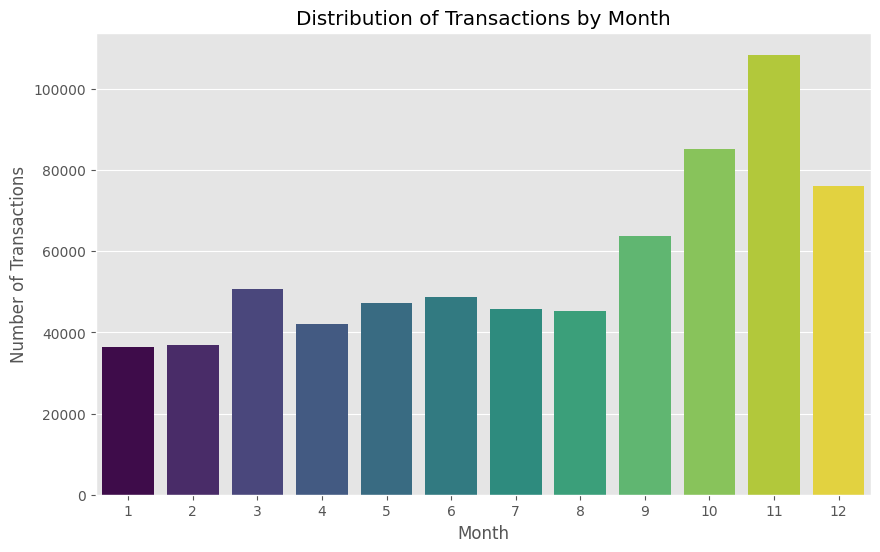

In [31]:
# Plot distribution of transactions by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis', hue='Month', legend=False)
plt.title('Distribution of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

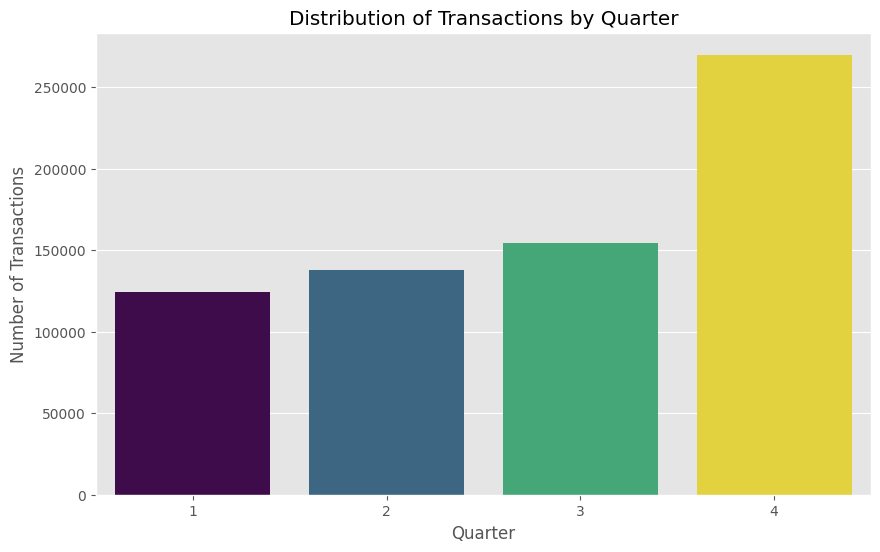

In [32]:
# Plot distribution of transactions by quarter
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter', data=df, palette='viridis', hue='Quarter', legend=False)
plt.title('Distribution of Transactions by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.show()

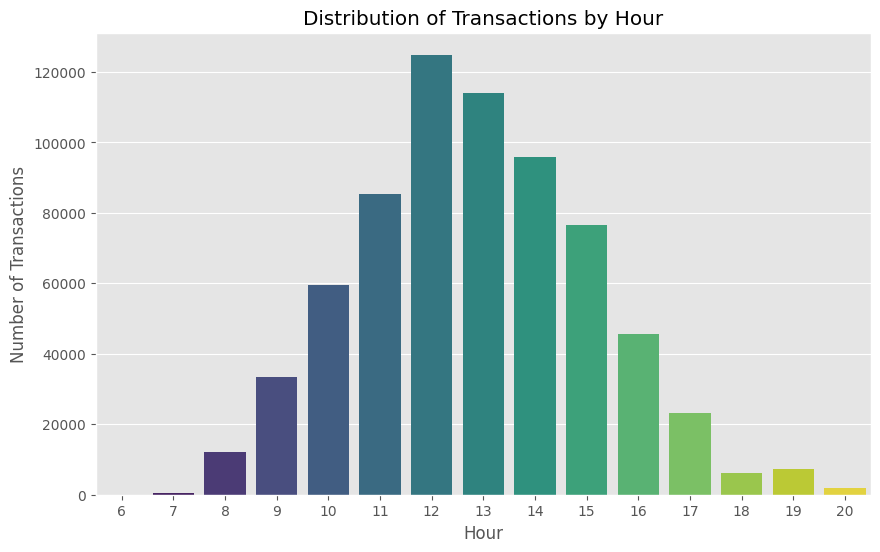

In [33]:
# Plot distribution of transactions by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis', hue='Hour', legend=False)
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

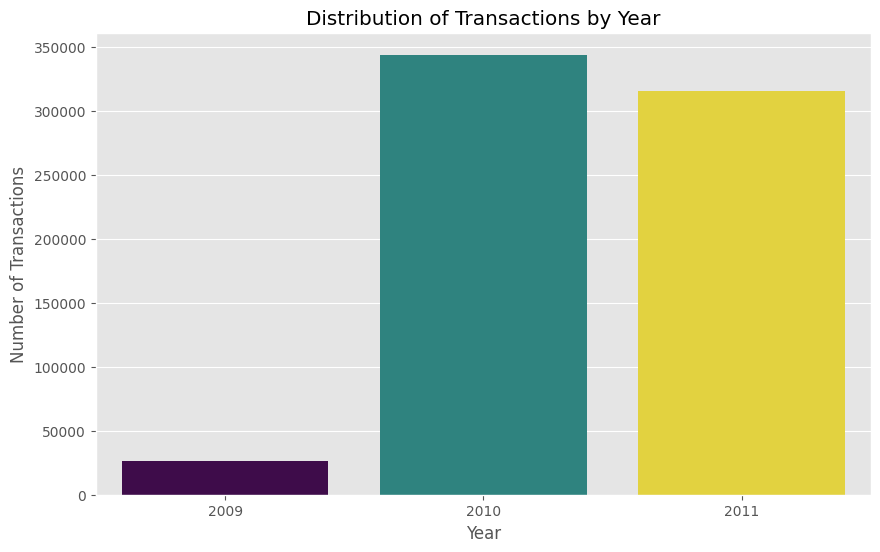

In [34]:
# Plot distribution of transactions by year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='viridis', hue='Year', legend=False)
plt.title('Distribution of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.show()

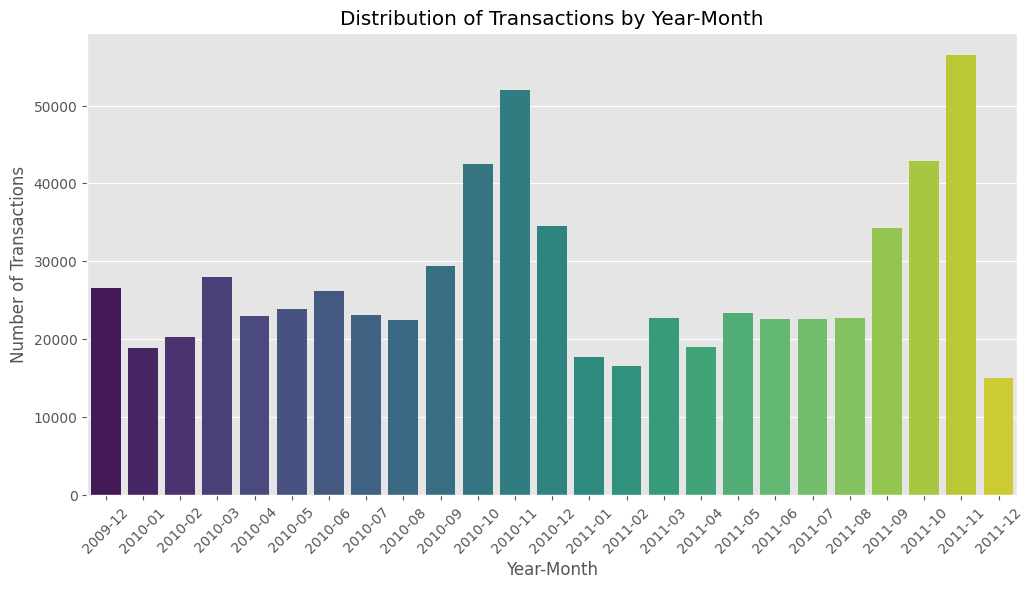

In [35]:
# Plot distribution of transactions by Year-Month
plt.figure(figsize=(12, 6))
sns.countplot(x='YearMonth', data=df, palette='viridis', hue='YearMonth', legend=False)
plt.title('Distribution of Transactions by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

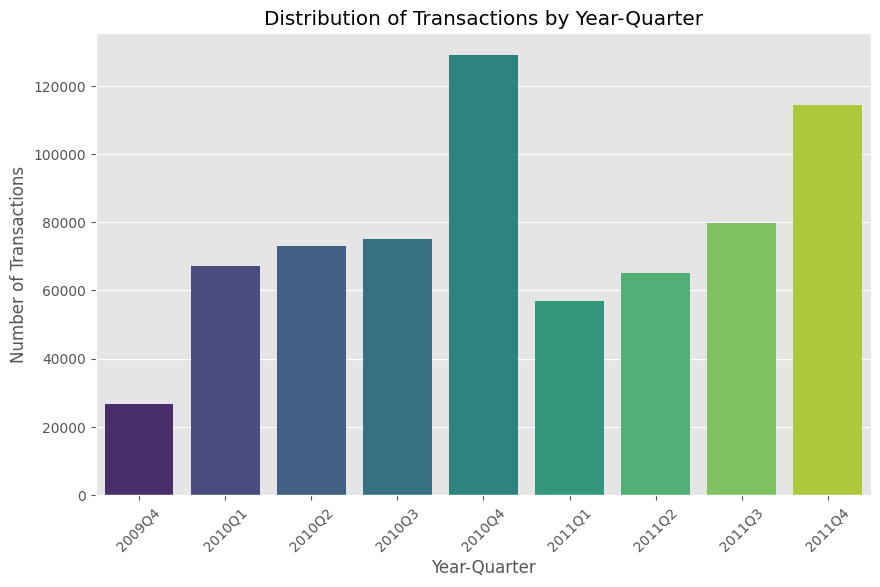

In [36]:
# Plot distribution of transactions by Year-Quarter
plt.figure(figsize=(10, 6))
sns.countplot(x='YearQuarter', data=df, palette='viridis', hue='YearQuarter', legend=False)
plt.title('Distribution of Transactions by Year-Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# 5 Key Performance Indicators (KPIs)

## 5.1 Total Revenue



> Definition: The sum of all sales revenues generated within a specified period.

> Calculation: Total Revenue=∑ (Quantity × UnitPrice)

> Importance: Provides a fundamental measure of business success and growth over time.


In [37]:
# Calculate Total Revenue
df['TotalRevenue'] = df['Quantity'] * df['Price']

# Group by Year-Month and calculate Total Revenue
revenue_monthly = df.groupby('YearMonth')['TotalRevenue'].sum().reset_index()
revenue_monthly['YearMonth'] = revenue_monthly['YearMonth'].astype(str)
revenue_monthly

,YearMonth,TotalRevenue
0,2009-12,367907.030
1,2010-01,255660.402
2,2010-02,265375.596
3,2010-03,358588.481
4,2010-04,311607.902
5,2010-05,310853.240
6,2010-06,321525.100
7,2010-07,298128.530
8,2010-08,297686.610
9,2010-09,407403.191


In [38]:
revenue_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearMonth     25 non-null     object 
 1   TotalRevenue  25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 528.0+ bytes


In [39]:
def plot_line_graph(dataframe, x_col, y_col, x_label, y_label, plot_title):
    fig = px.line(dataframe, x=x_col, y=y_col, title=plot_title)
    fig.update_layout(
        plot_bgcolor='lightgrey',  # light grey background color
    )
    fig.update_traces(line=dict(color='red'))  # dark red line color
    fig.update_xaxes(title_text=x_label, tickangle=-45)
    fig.update_yaxes(title_text=y_label)
    fig.show()

In [40]:
plot_line_graph(revenue_monthly, x_col='YearMonth', y_col='TotalRevenue', x_label='Year-Month', y_label='Total Revenue', plot_title='Total Revenue over Year-Month')

In [41]:
# Group by Year-Quarter and calculate Total Revenue
revenue_quarterly = df.groupby('YearQuarter')['TotalRevenue'].sum().reset_index()
revenue_quarterly

,YearQuarter,TotalRevenue
0,2009Q4,367907.030
1,2010Q1,879624.479
2,2010Q2,943986.242
3,2010Q3,1003218.331
4,2010Q4,1598025.212
5,2011Q1,740509.260
6,2011Q2,860128.591
7,2011Q3,1078434.083
8,2011Q4,1353775.980


In [42]:
revenue_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   YearQuarter   9 non-null      period[Q-DEC]
 1   TotalRevenue  9 non-null      float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 272.0 bytes


In [43]:
revenue_quarterly['YearQuarter'] = revenue_quarterly['YearQuarter'].astype(str)

In [44]:
plot_line_graph(revenue_quarterly, x_col='YearQuarter', y_col='TotalRevenue', x_label='Year-Quarter', y_label='Total Revenue', plot_title='Total Revenue over Year-Quarter')

## 5.2 Number of Orders

> Definition: Total count of orders made within a specified period.

> Importance: Indicates the volume of business activity and customer engagement.

In [45]:
# Group by Year-Month and calculate Number of Orders
orders_monthly = df.groupby('YearMonth')['Invoice'].nunique().reset_index()
orders_monthly.columns = ['YearMonth', 'NumberOfOrders']

orders_monthly['YearMonth'] = orders_monthly['YearMonth'].astype(str)

# Plot Number of Orders over Year-Month
plot_line_graph(orders_monthly, x_col='YearMonth', y_col='NumberOfOrders', x_label='Year-Month', y_label='Number of Orders', plot_title='Number of Orders over Year-Month')

In [46]:
# Group by Year-Quarter and calculate Number of Orders
orders_quarterly = df.groupby('YearQuarter')['Invoice'].nunique().reset_index()
orders_quarterly.columns = ['YearQuarter', 'NumberOfOrders']

orders_quarterly['YearQuarter'] = orders_quarterly['YearQuarter'].astype(str)

# Plot Number of Orders over Year-Quarter
plot_line_graph(orders_quarterly, x_col='YearQuarter', y_col='NumberOfOrders', x_label='Year-Quarter', y_label='Number of Orders', plot_title='Number of Orders over Year-Quarter')

## 5.3 Average Purchase Frequency

> Definition: Average number of purchases made by a customer in a given period.


> Calculation: Average Purchase Frequency = Total Number of Orders / Number of Unique Customers


>Importance: Helps in understanding customer behavior and targeting repeat customers.

In [47]:
# Group by Year-Month and calculate Number of Unique Customers
customers_monthly = df.groupby('YearMonth')['Customer ID'].nunique().reset_index()
customers_monthly.columns = ['YearMonth', 'NumberOfCustomers']

customers_monthly['YearMonth'] = customers_monthly['YearMonth'].astype(str)

# Merge the dataframes on YearMonth
monthly_data = pd.merge(orders_monthly, customers_monthly, on='YearMonth')

# Calculate Average Purchase Frequency
monthly_data['AveragePurchaseFrequency'] = monthly_data['NumberOfOrders'] / monthly_data['NumberOfCustomers']

# Plot Number of Orders over Year-Month
plot_line_graph(monthly_data, x_col='YearMonth', y_col='AveragePurchaseFrequency', x_label='Year-Month', y_label='Average Purchase Frequency', plot_title='Average Purchase Frequency over Year-Month')

In [48]:
# Group by Year-Quarter and calculate Number of Unique Customers
customers_quarterly = df.groupby('YearQuarter')['Customer ID'].nunique().reset_index()
customers_quarterly.columns = ['YearQuarter', 'NumberOfCustomers']

customers_quarterly['YearQuarter'] = customers_quarterly['YearQuarter'].astype(str)

# Merge the dataframes on YearQuarter
quarterly_data = pd.merge(orders_quarterly, customers_quarterly, on='YearQuarter')

# Calculate Average Purchase Frequency
quarterly_data['AveragePurchaseFrequency'] = quarterly_data['NumberOfOrders'] / quarterly_data['NumberOfCustomers']

# Plot Number of Orders over Year-Quarter
plot_line_graph(quarterly_data, x_col='YearQuarter', y_col='AveragePurchaseFrequency', x_label='Year-Quarter', y_label='Average Purchase Frequency', plot_title='Average Purchase Frequency over Year-Quarter')

## 5.4 Average Revenue per User (ARPU)

> Definition: Average revenue generated by each customer over a specific period.

> Calculation: ARPU = Total Revenue / Number of Unique Customers

> Importance: Provides insights into customer value and revenue potential.

In [49]:
# Merge the dataframes on YearMonth for Total Revenue and Unique Customers
monthly_data = pd.merge(revenue_monthly, customers_monthly, on='YearMonth')

# Calculate ARPU
monthly_data['ARPU'] = monthly_data['TotalRevenue'] / monthly_data['NumberOfCustomers']

# Plot Number of Orders over Year-Month
plot_line_graph(monthly_data, x_col='YearMonth', y_col='ARPU', x_label='Year-Month', y_label='ARPU', plot_title='Average Revenue per User (ARPU) over Year-Month')

In [50]:
# Merge the dataframes on YearQuarter for Total Revenue and Unique Customers
quarterly_data = pd.merge(revenue_quarterly, customers_quarterly, on='YearQuarter')

# Calculate ARPU
quarterly_data['ARPU'] = quarterly_data['TotalRevenue'] / quarterly_data['NumberOfCustomers']

# Plot Number of Orders over Year-Month
plot_line_graph(quarterly_data, x_col='YearQuarter', y_col='ARPU', x_label='Year-Quarter', y_label='ARPU', plot_title='Average Revenue per User (ARPU) over Year-Quarter')

## 5.5 Average Order Value (AOV)

> Definition: The average amount spent by customers per order.

> Calculation: AOV = Total Revenue / Number of Orders

> Importance: Helps in understanding customer spending patterns and optimizing marketing and sales strategies.


In [51]:
# Merge the dataframes on YearMonth for Total Revenue and Number of Orders
monthly_data = pd.merge(revenue_monthly, orders_monthly, on='YearMonth')

# Calculate AOV
monthly_data['AOV'] = monthly_data['TotalRevenue'] / monthly_data['NumberOfOrders']

# Plot AOV over Year-Month
plot_line_graph(monthly_data, x_col='YearMonth', y_col='AOV', x_label='Year-Month', y_label='AOV', plot_title='Average Order Value (AOV) over Year-Month')

In [52]:
# Merge the dataframes on YearQuarter for Total Revenue and Number of Orders
quarterly_data = pd.merge(revenue_quarterly, orders_quarterly, on='YearQuarter')

# Calculate AOV
quarterly_data['AOV'] = quarterly_data['TotalRevenue'] / quarterly_data['NumberOfOrders']

# Plot AOV over Year-Quarter
plot_line_graph(quarterly_data, x_col='YearQuarter', y_col='AOV', x_label='Year-Quarter', y_label='AOV', plot_title='Average Order Value (AOV) over Year-Quarter')

## 5.6 Unique Customer Count

> Definition: The total number of distinct customers who made purchases within a specified period.

> Importance: Helps measure customer growth over time, which is essential for evaluating the effectiveness of marketing and customer retention strategies.

In [53]:
# Plot Unique Customer Count over Year-Month
plot_line_graph(customers_monthly, x_col='YearMonth', y_col='NumberOfCustomers', x_label='Year-Month', y_label='Number of Unique Customers', plot_title='Unique Customer Count over Year-Month')

# Plot Unique Customer Count over Year-Quarter
plot_line_graph(customers_quarterly, x_col='YearQuarter', y_col='NumberOfCustomers', x_label='Year-Quarter', y_label='Number of Unique Customers', plot_title='Unique Customer Count over Year-Quarter')

## 5.7 Total Quantity of Products sold

> Definition: The total number of product units sold within a specified period.

> Importance: Provides a clear picture of sales volume, which is crucial for inventory management and supply chain planning.


In [54]:
# Group by Year-Month and Year-Quarter and sum Quantity
quantity_monthly = df.groupby('YearMonth')['Quantity'].sum().reset_index()
quantity_monthly['YearMonth'] = quantity_monthly['YearMonth'].astype(str)

quantity_quarterly = df.groupby('YearQuarter')['Quantity'].sum().reset_index()
quantity_quarterly['YearQuarter'] = quantity_quarterly['YearQuarter'].astype(str)

# Plot Quantity Sold over Year-Month
plot_line_graph(quantity_monthly, x_col='YearMonth', y_col='Quantity', x_label='Year-Month', y_label='Quantity Sold', plot_title='Quantity Sold over Year-Month')

# Plot Quantity Sold over Year-Quarter
plot_line_graph(quantity_quarterly, x_col='YearQuarter', y_col='Quantity', x_label='Year-Quarter', y_label='Quantity Sold', plot_title='Quantity Sold over Year-Quarter')

## 5.8 Number of Unique Orders per Country

> Definition: The total count of unique orders made in each country within a specified period.

> Importance: Offers insights into the performance and sales distribution across different geographical locations.


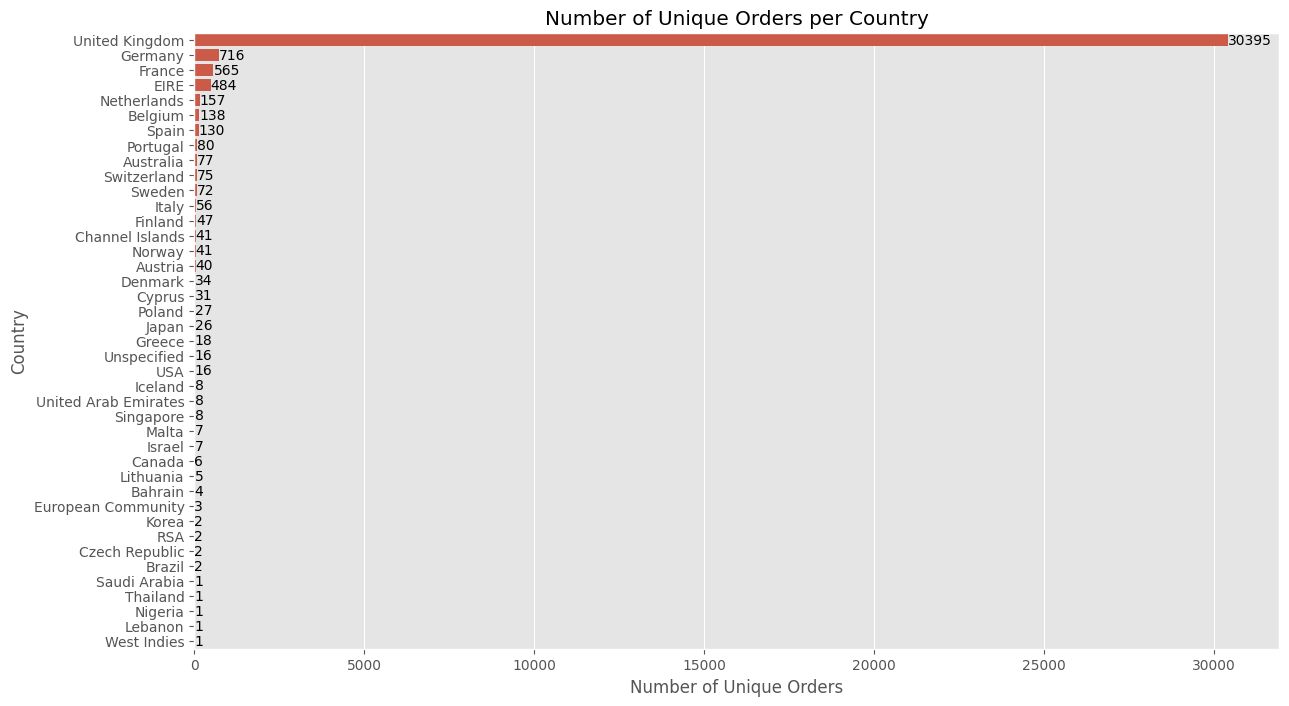

In [55]:
# Calculate the number of unique orders per country
unique_orders_per_country = df.groupby('Country')['Invoice'].nunique().reset_index()
unique_orders_per_country.columns = ['Country', 'UniqueOrders']

unique_orders_per_country = unique_orders_per_country.sort_values(by='UniqueOrders', ascending=False)

# Plot the number of unique orders per country
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='UniqueOrders', y='Country', data=unique_orders_per_country, order=unique_orders_per_country['Country'])
plt.title('Number of Unique Orders per Country')
plt.xlabel('Number of Unique Orders')
plt.ylabel('Country')

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

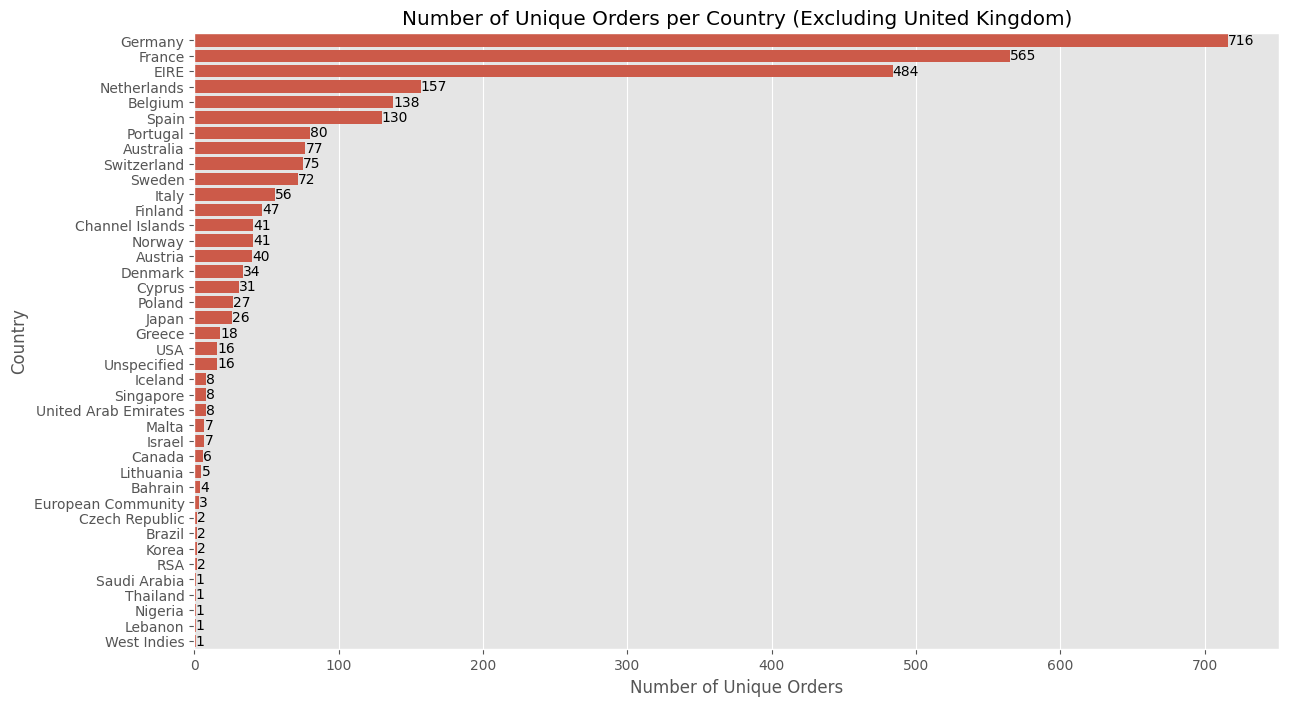

In [56]:
# Exclude United Kingdom
unique_orders_per_country_excl_uk = unique_orders_per_country[unique_orders_per_country['Country'] != 'United Kingdom']

unique_orders_per_country_excl_uk = unique_orders_per_country_excl_uk.sort_values(by='UniqueOrders', ascending=False)

# Plot number of unique orders per country (excluding United Kingdom)
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='UniqueOrders', y='Country', data=unique_orders_per_country_excl_uk, order=unique_orders_per_country_excl_uk['Country'])
plt.title('Number of Unique Orders per Country (Excluding United Kingdom)')
plt.xlabel('Number of Unique Orders')
plt.ylabel('Country')

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

# 6 Time Series Forecasting with Prophet



## 6.1 Daily Revenue Forecast

### 6.1.1 Data Preparation

In [57]:
# Calculate Revenue
df['Revenue'] = df['Quantity'] * df['Price']

# Extract date from InvoiceDate
df['InvoiceDate2'] = df['InvoiceDate'].dt.date

# # Aggregate the data by date to ensure each date has a unique revenue value
df_daily_revenue = df.groupby('InvoiceDate2')['Revenue'].sum().reset_index()

# Rename columns for Prophet compatibility
df_daily_revenue = df_daily_revenue.rename(columns={'InvoiceDate2': 'ds', 'Revenue': 'y'})

df_daily_revenue

,ds,y
0,2009-12-01,26635.40
1,2009-12-02,21398.74
2,2009-12-03,30360.66
3,2009-12-04,22332.63
4,2009-12-05,7560.66
...,...,...
599,2011-12-05,32588.62
600,2011-12-06,22677.34
601,2011-12-07,25993.12
602,2011-12-08,23392.66


In [58]:
plot_line_graph(df_daily_revenue, x_col='ds', y_col='y', x_label='Date', y_label='Total Revenue', plot_title='Daily Revenue')

### 6.1.2 Initialize and Fit Prophet Model

In [59]:
# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df_daily_revenue)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3mqph81j/kqvxqffj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3mqph81j/njgdctbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92694', 'data', 'file=/tmp/tmp3mqph81j/kqvxqffj.json', 'init=/tmp/tmp3mqph81j/njgdctbz.json', 'output', 'file=/tmp/tmp3mqph81j/prophet_modelg83ztdl3/prophet_model-20240711132541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### 6.1.3 Make Future Predictions

In [60]:
# Generate future dates for forecasting
future_dates = model.make_future_dataframe(periods=365)  # Forecasting for 1 year

# Make predictions
forecast = model.predict(future_dates)

### 6.1.4 Plot Forecasted Results

In [61]:
plot_plotly(model, forecast, xlabel='Date', ylabel='Revenue', figsize=(1400, 900))

In [62]:
plot_components_plotly(model, forecast, figsize=(1400, 500))



---



## 6.2 Monthly Revenue Forecast

### 6.1.1 Data Preparation

In [63]:
# Calculate Total Revenue
df['TotalRevenue'] = df['Quantity'] * df['Price']

# Group by Year-Month and calculate Total Revenue
revenue_monthly = df.groupby('YearMonth')['TotalRevenue'].sum().reset_index()
revenue_monthly['YearMonth'] = revenue_monthly['YearMonth'].astype('datetime64[M]')
revenue_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   YearMonth     25 non-null     datetime64[ns]
 1   TotalRevenue  25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 528.0 bytes


In [64]:
# Rename columns for Prophet compatibility
df_monthly_revenue = revenue_monthly.rename(columns={'YearMonth': 'ds', 'TotalRevenue': 'y'})

df_monthly_revenue

,ds,y
0,2009-12-01,367907.030
1,2010-01-01,255660.402
2,2010-02-01,265375.596
3,2010-03-01,358588.481
4,2010-04-01,311607.902
5,2010-05-01,310853.240
6,2010-06-01,321525.100
7,2010-07-01,298128.530
8,2010-08-01,297686.610
9,2010-09-01,407403.191


In [65]:
plot_line_graph(df_monthly_revenue, x_col='ds', y_col='y', x_label='Year-Month', y_label='Total Revenue', plot_title='Monthly Revenue')

### 6.1.2 Initialize and Fit Prophet Model

In [66]:
# Initialize Prophet model
model_monthly = Prophet()

# Fit the model
model_monthly.fit(df_monthly_revenue)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3mqph81j/8m_903gi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3mqph81j/ztha697p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84422', 'data', 'file=/tmp/tmp3mqph81j/8m_903gi.json', 'init=/tmp/tmp3mqph81j/ztha697p.json', 'output', 'file=/tmp/tmp3mqph81j/prophet_modelxbr11duz/prophet_model-20240711132542.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:25:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:

### 6.1.3 Make Future Predictions

In [67]:
# Generate future data for forecasting
future_months = model_monthly.make_future_dataframe(periods=12, freq='M')  # Forecasting for 12 months

# Make predictions
forecast_monthly = model_monthly.predict(future_months)

### 6.1.4 Plot Forecasted Results

In [68]:
plot_plotly(model_monthly, forecast_monthly, xlabel='YearMonth', ylabel='Revenue', figsize=(1400, 900))

In [69]:
plot_components_plotly(model_monthly, forecast_monthly, figsize=(1400, 500))



---

